In [2]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from matplotlib import pyplot as plt

In [3]:
trans = transforms.ToTensor()
train_data = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
test_data = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

In [4]:
train_iter = data.DataLoader(train_data, batch_size=100, shuffle=True,
                             num_workers=4)
test_iter = data.DataLoader(test_data, batch_size=100, shuffle=True,
                            num_workers=4)

In [5]:
from torch import nn

In [6]:
sequence_length = 28
input_size = 28
hidden_size = 128
num_classes = 10
batch_size = 100
num_epochs = 5
learning_rate = 0.01

In [22]:
class my_rnn(nn.Module):
        def __init__(self,input_size, hidden_size, batch_size, num_outputs):
            super(my_rnn,self).__init__()
            self.hidden_size = hidden_size
            self.U = nn.Linear(input_size, hidden_size)
            self.W = nn.Linear(hidden_size, hidden_size)
            self.V = nn.Linear(hidden_size, num_outputs)
        def forward(self,X):
            X = X.reshape(-1, X.size(2),X.size(3))
            sequence_len = X.size(1)
            A = torch.rand(X.size(0), self.hidden_size)
            for i in range(sequence_len):
                input1 = X[:, i, :]
                input1 = self.U(input1)
                input2 = self.W(A)
                A = torch.relu(input1 + input2)
            return self.V(A)

In [23]:
model = my_rnn(input_size, hidden_size, batch_size, num_classes)
print(model)

my_rnn(
  (U): Linear(in_features=28, out_features=128, bias=True)
  (W): Linear(in_features=128, out_features=128, bias=True)
  (V): Linear(in_features=128, out_features=10, bias=True)
)


In [24]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [25]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [26]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [27]:
def train(num_epochs, net):
    Accuracy=[]
    total_step = 600 
    for epoch in range(num_epochs):
        a=0
        for i, (images,labels) in enumerate(train_iter):
            
            # Forward pass
            outputs = net(images)
            loss = loss_func(outputs, labels)
            a += accuracy(outputs, labels)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                
        Accuracy.append(a/(600*batch_size))
    plt.plot(range(1,num_epochs+1), Accuracy, label = 'accuracy')
    plt.xlabel('num epochs')
    plt.legend()
    plt.show()

Epoch [1/5], Step [100/600], Loss: 0.9902
Epoch [1/5], Step [200/600], Loss: 0.9508
Epoch [1/5], Step [300/600], Loss: 0.8661
Epoch [1/5], Step [400/600], Loss: 0.7592
Epoch [1/5], Step [500/600], Loss: 0.9298
Epoch [1/5], Step [600/600], Loss: 0.6756
Epoch [2/5], Step [100/600], Loss: 0.7922
Epoch [2/5], Step [200/600], Loss: 0.6786
Epoch [2/5], Step [300/600], Loss: 0.6754
Epoch [2/5], Step [400/600], Loss: 0.8547
Epoch [2/5], Step [500/600], Loss: 0.9656
Epoch [2/5], Step [600/600], Loss: 1.8059
Epoch [3/5], Step [100/600], Loss: 1.0233
Epoch [3/5], Step [200/600], Loss: 1.4488
Epoch [3/5], Step [300/600], Loss: 0.9475
Epoch [3/5], Step [400/600], Loss: 0.8454
Epoch [3/5], Step [500/600], Loss: 1.0211
Epoch [3/5], Step [600/600], Loss: 0.9502
Epoch [4/5], Step [100/600], Loss: 0.9831
Epoch [4/5], Step [200/600], Loss: 0.8750
Epoch [4/5], Step [300/600], Loss: 0.8012
Epoch [4/5], Step [400/600], Loss: 0.7977
Epoch [4/5], Step [500/600], Loss: 0.8603
Epoch [4/5], Step [600/600], Loss:

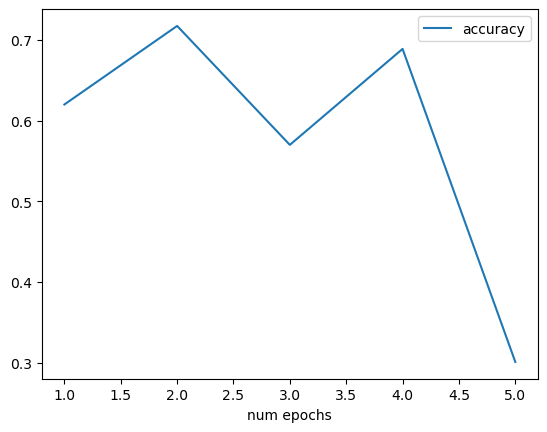

In [28]:
train(num_epochs, model)

# 经过很多次的测试，发现RNN在图片识别上随着训练轮数增加，性能不太稳定

![3，4轮骤降，并且在振荡](5_epochs.png)
<div style="text-align:center">
 3，4轮骤降，并且在振荡
</div>

![第3轮骤降](5_epochs2.png)

<div style="text-align:center">
第3轮骤降
</div>

![从第3轮开始下降](6_epochs.png)

<div style="text-align:center">
从第3轮开始下降
</div>

# 总体上训练2轮时性能在一个比较高的区间内，故选择训练2轮的模型测试

Epoch [1/2], Step [100/600], Loss: 1.0956
Epoch [1/2], Step [200/600], Loss: 0.8235
Epoch [1/2], Step [300/600], Loss: 0.7624
Epoch [1/2], Step [400/600], Loss: 0.7757
Epoch [1/2], Step [500/600], Loss: 0.7045
Epoch [1/2], Step [600/600], Loss: 0.7166
Epoch [2/2], Step [100/600], Loss: 0.8390
Epoch [2/2], Step [200/600], Loss: 0.7382
Epoch [2/2], Step [300/600], Loss: 0.6890
Epoch [2/2], Step [400/600], Loss: 0.5754
Epoch [2/2], Step [500/600], Loss: 0.6438
Epoch [2/2], Step [600/600], Loss: 0.6068


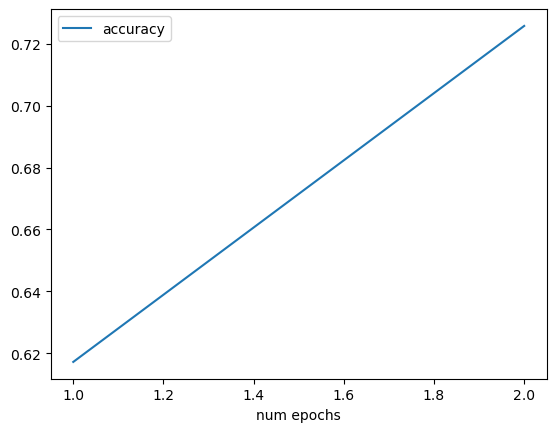

In [36]:
best_epoch = 2
best_model = my_rnn(input_size, hidden_size, batch_size, num_classes)
optimizer = optim.Adam(best_model.parameters(), lr = 0.01)
train(best_epoch, best_model)

In [37]:
best_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_iter:
        outputs = best_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total = total + labels.size(0)
        correct = correct + (predicted == labels).sum().item()
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 73.79 %
